In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.create_model_pickle import *

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1: EDA 

In [5]:
data_path = "../data/data.json"
df = pd.read_json(data_path)

In [6]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{u'event_id': 527017, u'cost': 25.0, u'availa...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{u'event_id': 786878, u'cost': 35.0, u'availa...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{u'event_id': 787337, u'cost': 93.51, u'avail...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{u'event_id': 885645, u'cost': 25.0, u'availa...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{u'event_id': 1114349, u'cost': 150.0, u'avai...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


## Add Fraud Column

 * Do not include Spammers

In [8]:
df['acct_type'].value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [14]:
### POTENTIAL PIPELINE STEP
df['fraud'] = df['acct_type'].str.contains("fraud")

In [15]:
df['fraud'].value_counts()

False    13044
True      1293
Name: fraud, dtype: int64

 * Unbalanced Classes

### Feature Exploration

##### Description Box

In [40]:
### ADD TO PIPELINE

df['empty_desc'] = df['description'] == u''

In [44]:
df[df['fraud'] == True]['empty_desc'].value_counts()

False    963
True     330
Name: empty_desc, dtype: int64

In [74]:
(df[df['fraud'] == False]['empty_desc'] == True).sum()

499

#### Find Features To Eliminate
 * Description (body length contains info)

Body Length - Can Eliminate Description Field

AttributeError: 'module' object has no attribute 'set_xlim'

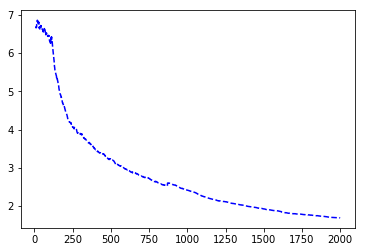

In [80]:
fraud_short_list = []
premium_short_list = []
cutoffs = range(10, 2000)

for cutoff_length in cutoffs:

    df['short_description'] = df['body_length'] < cutoff_length


    fraud_short = float((df[df['fraud'] == True]['short_description'] == True).sum())\
                   / float((df[df['fraud'] == True]['short_description'] == False).count())

    premium_short = float((df[df['fraud'] == False]['short_description'] == True).sum()) \
                    / (df[df['fraud'] == False]['short_description'] == False).count()

    ratio = fraud_short / premium_short
    fraud_short_list.append(ratio)

    

    
plt.plot(cutoffs, fraud_short_list, 'b--')
plt.set_xlim(0, 200)

plt.show()
    


    

In [63]:
fraud_short_list

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [53]:
444 / 849.0

0.5229681978798587

In [55]:
708.0 / 12336

0.057392996108949414

In [56]:
from sklearn.metrics import confusion_matrix